In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
sale = pd.read_csv('Dummy Data HSS.csv')

In [3]:
sale.head()

,TV,Radio,Social Media,Influencer,Sales
0,16.0,6.566231,2.907983,Mega,54.732757
1,13.0,9.237765,2.409567,Mega,46.677897
2,41.0,15.886446,2.913410,Mega,150.177829
3,83.0,30.020028,6.922304,Mega,298.246340
4,15.0,8.437408,1.405998,Micro,56.594181


In [4]:
sale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TV            4562 non-null   float64
 1   Radio         4568 non-null   float64
 2   Social Media  4566 non-null   float64
 3   Influencer    4572 non-null   object 
 4   Sales         4566 non-null   float64
dtypes: float64(4), object(1)
memory usage: 178.7+ KB


In [6]:
sale.isnull().sum()

TV              10
Radio            4
Social Media     6
Influencer       0
Sales            6
dtype: int64

In [8]:
sale = sale[~sale['Sales'].isnull()]

In [9]:
sale.isnull().sum()

TV              10
Radio            4
Social Media     6
Influencer       0
Sales            0
dtype: int64

In [11]:
sale.describe()

,TV,Radio,Social Media,Sales
count,4556.000000,4562.000000,4560.000000,4566.000000
mean,54.068042,18.161617,3.325184,192.466602
std,26.116949,9.672827,2.212183,93.133092
min,10.000000,0.000684,0.000031,31.199409
25%,32.000000,10.553457,1.529879,112.322882
50%,53.000000,17.859513,3.056028,189.231172
75%,77.000000,25.651667,4.807356,272.507922
max,100.000000,48.871161,13.981662,364.079751


<AxesSubplot:xlabel='Influencer', ylabel='Sales'>

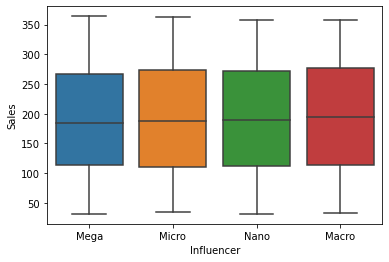

In [15]:
sns.boxplot(x='Influencer', y='Sales', data=sale)

In [18]:
sale['TV'].fillna(sale['TV'].mean(), inplace=True)

In [19]:
sale['Radio'].fillna(sale['Radio'].mean(), inplace=True)

In [20]:
sale['Social Media'].fillna(sale['Social Media'].mean(), inplace=True)

In [23]:
sale.isna().sum()

TV              0
Radio           0
Social Media    0
Influencer      0
Sales           0
dtype: int64

In [25]:
sale = pd.get_dummies(sale)

## Splitting and scaling data

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [26]:
X = sale.drop('Sales', axis=1)
y = sale['Sales']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [28]:
scale = MinMaxScaler()

In [29]:
X_train = scale.fit_transform(X_train)

In [30]:
X_test = scale.transform(X_test)

## Creating neural network model

In [135]:
import tensorflow.keras as kr
import datetime

In [136]:
model = kr.models.Sequential()

In [137]:
model.add(kr.layers.Dense(10, activation='relu'))
model.add(kr.layers.Dropout(0.4))
model.add(kr.layers.Dense(6, activation='relu'))
model.add(kr.layers.Dropout(0.4))
model.add(kr.layers.Dense(3, activation='relu'))
model.add(kr.layers.Dropout(0.4))

model.add(kr.layers.Dense(1, activation='relu'))

In [138]:
model.compile(optimizer='adam', loss='mse')

In [139]:
early = kr.callbacks.EarlyStopping(monitor='val_loss', mode='min', patience=50)

In [140]:
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

board = kr.callbacks.TensorBoard(log_dir=log_dir,
                                 histogram_freq=1,
                                 write_graph=True,
                                 write_images=True,
                                 update_freq='epoch',
                                 profile_batch=2,
                                 embeddings_freq=1)

In [141]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=700, callbacks=[early, board])

Epoch 1/700
100/100 [==============================] - 4s 22ms/step - loss: 45079.1953 - val_loss: 46134.9375
Epoch 2/700
100/100 [==============================] - 1s 10ms/step - loss: 43573.9727 - val_loss: 42834.8164
Epoch 3/700
100/100 [==============================] - 1s 10ms/step - loss: 37783.3125 - val_loss: 32602.7422
Epoch 4/700
100/100 [==============================] - 1s 10ms/step - loss: 28008.2070 - val_loss: 18283.9180
Epoch 5/700
100/100 [==============================] - 1s 9ms/step - loss: 22482.8984 - val_loss: 12068.9873
Epoch 6/700
100/100 [==============================] - 1s 10ms/step - loss: 21171.2168 - val_loss: 11003.0088
Epoch 7/700
100/100 [==============================] - 1s 10ms/step - loss: 20708.7422 - val_loss: 10290.9834
Epoch 8/700
100/100 [==============================] - 1s 10ms/step - loss: 19555.0996 - val_loss: 9754.2607
Epoch 9/700
100/100 [==============================] - 1s 9ms/step - loss: 19747.0234 - val_loss: 9460.4746
Epoch 10/700
1

100/100 [==============================] - 1s 9ms/step - loss: 14209.0449 - val_loss: 5584.2534
Epoch 76/700
100/100 [==============================] - 1s 10ms/step - loss: 13996.0176 - val_loss: 4886.3062
Epoch 77/700
100/100 [==============================] - 1s 10ms/step - loss: 14425.4443 - val_loss: 5443.6611
Epoch 78/700
100/100 [==============================] - 1s 10ms/step - loss: 14345.9434 - val_loss: 4987.7744
Epoch 79/700
100/100 [==============================] - 1s 10ms/step - loss: 14057.5879 - val_loss: 5466.9214
Epoch 80/700
100/100 [==============================] - 1s 11ms/step - loss: 13705.5283 - val_loss: 5470.8955
Epoch 81/700
100/100 [==============================] - 1s 11ms/step - loss: 13662.6611 - val_loss: 5354.2891
Epoch 82/700
100/100 [==============================] - 1s 10ms/step - loss: 13785.5244 - val_loss: 5064.5889
Epoch 83/700
100/100 [==============================] - 1s 11ms/step - loss: 14079.9922 - val_loss: 5180.1611
Epoch 84/700
100/100 [==

100/100 [==============================] - 1s 12ms/step - loss: 12778.6768 - val_loss: 4537.0693
Epoch 150/700
100/100 [==============================] - 1s 10ms/step - loss: 12544.1074 - val_loss: 4405.7769
Epoch 151/700
100/100 [==============================] - 1s 11ms/step - loss: 12826.3281 - val_loss: 4393.1763
Epoch 152/700
100/100 [==============================] - 1s 10ms/step - loss: 12489.1299 - val_loss: 4890.8477
Epoch 153/700
100/100 [==============================] - 1s 10ms/step - loss: 12280.4805 - val_loss: 4194.0820
Epoch 154/700
100/100 [==============================] - 1s 10ms/step - loss: 13175.7500 - val_loss: 4025.1792
Epoch 155/700
100/100 [==============================] - 1s 11ms/step - loss: 12752.0654 - val_loss: 4260.0493
Epoch 156/700
100/100 [==============================] - 1s 10ms/step - loss: 12296.1729 - val_loss: 4353.3613
Epoch 157/700
100/100 [==============================] - 1s 11ms/step - loss: 12261.1426 - val_loss: 4119.2031
Epoch 158/700
1

100/100 [==============================] - 1s 9ms/step - loss: 12178.5547 - val_loss: 3981.2051
Epoch 224/700
100/100 [==============================] - 1s 9ms/step - loss: 11205.4893 - val_loss: 4389.6772
Epoch 225/700
100/100 [==============================] - 1s 9ms/step - loss: 11703.4258 - val_loss: 4236.1084
Epoch 226/700
100/100 [==============================] - 1s 9ms/step - loss: 11395.9961 - val_loss: 3837.7205
Epoch 227/700
100/100 [==============================] - 1s 9ms/step - loss: 11884.8857 - val_loss: 4037.3696
Epoch 228/700
100/100 [==============================] - 1s 10ms/step - loss: 12136.6006 - val_loss: 4008.4233
Epoch 229/700
100/100 [==============================] - 1s 10ms/step - loss: 11714.1367 - val_loss: 4339.7080
Epoch 230/700
100/100 [==============================] - 1s 9ms/step - loss: 11455.6299 - val_loss: 4068.3938
Epoch 231/700
100/100 [==============================] - 1s 8ms/step - loss: 11105.6143 - val_loss: 4112.3364
Epoch 232/700
100/100 

In [142]:
erhist = pd.DataFrame(model.history.history)

In [153]:
erhist.head()

,loss,val_loss
0,45079.195312,46134.937500
1,43573.972656,42834.816406
2,37783.312500,32602.742188
3,28008.207031,18283.917969
4,22482.898438,12068.987305


In [144]:
px.line(erhist)

In [145]:
pred = model.predict(X_test)

43/43 [==============================] - 0s 2ms/step


In [146]:
y_test

1765    104.014127
1397    140.913996
925     321.719821
2882    257.381640
4267    121.326912
           ...    
3038    342.952628
2843    262.597449
4152    340.859569
517     143.172888
3126    267.287242
Name: Sales, Length: 1370, dtype: float64

In [147]:
ycomp = pd.DataFrame(y_test)

In [148]:
ycomp['Predicted y'] = pred[:,0]

In [149]:
ycomp.columns = ['True y', 'Predicted y']

In [150]:
ycomp.tail()

,True y,Predicted y
3038,342.952628,239.591827
2843,262.597449,185.493820
4152,340.859569,240.000092
517,143.172888,110.645706
3126,267.287242,188.529282


In [151]:
ycomp['loss'] = erhist['val_loss']

<AxesSubplot:xlabel='True y', ylabel='Predicted y'>

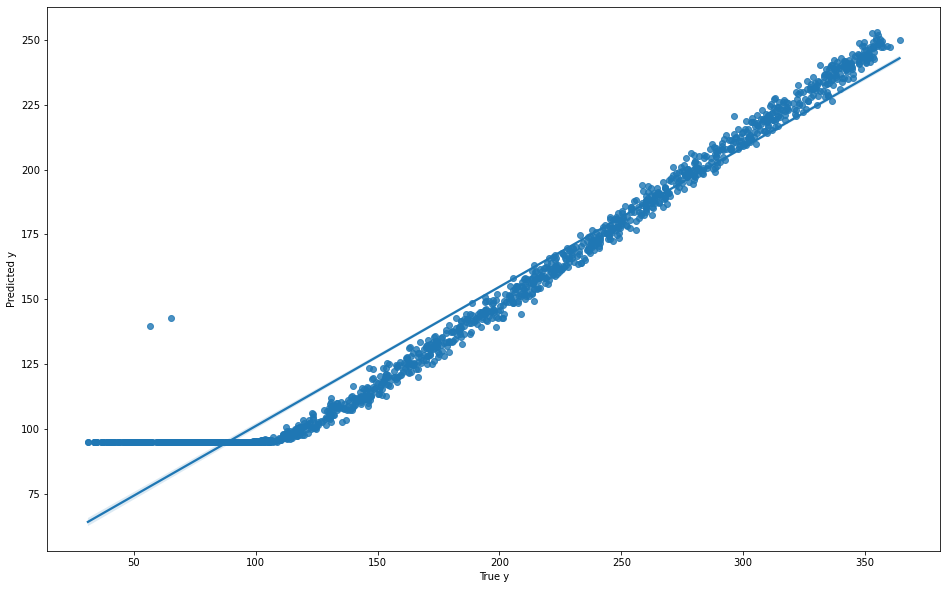

In [156]:
plt.figure(figsize=(16, 10))
sns.regplot(x='True y', y='Predicted y', data=ycomp, )

In [157]:
px.scatter(x='True y', y='Predicted y', data_frame=ycomp)